In [38]:
# This data analysis project includes reports, statistical analysis, and ad-hoc analysis. 
# I used supermarket sales dataset that is publicly available on Kaggle:
# https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [39]:
# Import necessary libraries

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from scipy.stats import f_oneway

In [40]:
# Read the data

df = pd.read_csv('supermarket_sales.csv')
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [41]:
# Check data size and data types

print("The number of rows and columns, respectively :", df.shape)
print("Data types of variables (columns): \n", df.dtypes)

The number of rows and columns, respectively : (1000, 17)
Data types of variables (columns): 
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [42]:
# Check if there are missing rows

c=df.isnull().sum()
print(c)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [43]:
# THE ANALSYS  

# SIMPLE REPORTS 
# Order cities by the number of invoices and total amount.
# Order product lines sales by amount and quantity.
# Order product lines by purchase from female customers.

# STATISTICAL ANALYSIS
# Is there a correlation between paymet and total?

# AD-HOC ANALYSIS (with visualizations)
# Show sales in total by the day of week.
# Show sales by the period of the day. 
# Compare Members vs non-Members sale.
# Compara sales by Gender in total.
# Compare sales by gender and product line.

In [44]:
# SIMPLE REPORTS 

# Order cities by the number of invoices and total amount

print("\n Cities ordered by number of invoices: \n", 
    df.groupby('City').count()["Invoice ID"].sort_values(ascending=False))

print("\n Cities ordered by amount: \n", 
    df.groupby('City').sum()["Total"].sort_values(ascending=False))



 Cities ordered by number of invoices: 
 City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: Invoice ID, dtype: int64

 Cities ordered by amount: 
 City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64


In [45]:
# Order product lines sales by amount and quantity

print("\n Product lines sales ordered by total amount: \n", 
    df.groupby('Product line').sum()["Total"].sort_values(ascending=False))

print("\n Product lines sales ordered by quantity: \n", 
    df.groupby('Product line').sum()["Quantity"].sort_values(ascending=False))


 Product lines sales ordered by total amount: 
 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

 Product lines sales ordered by quantity: 
 Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


In [46]:
# Order product lines by purchase from female customers

df_female = df[df['Gender'] == 'Female']
df_female_grouped = df_female.groupby(['Product line', 'Gender'])['Quantity'].sum().reset_index()
df_female_grouped = df_female_grouped.sort_values(by='Quantity', ascending=False)
print(df_female_grouped)

             Product line  Gender  Quantity
1     Fashion accessories  Female       530
2      Food and beverages  Female       514
4      Home and lifestyle  Female       498
5       Sports and travel  Female       496
0  Electronic accessories  Female       488
3       Health and beauty  Female       343


In [47]:
# STATISTICAL ANALASYS

# Q: Is there a correlation between payment and total?

# H0: Assumption is that variables Payment and Total are NOT correlated

# I will use the one-way anova test between Payment and Total
# ANOVA test test measures if there are any significant differences 
# between the means of the values of the numeric variable (Total) for each categorical value (Payment).

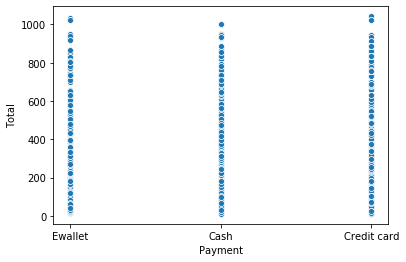

In [48]:
# Plot the observed variables

sns.scatterplot(data=df, x='Payment', y='Total')

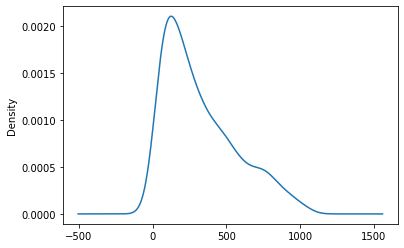

In [49]:
# Plot distribution of values in Total column
# ANOVA test assumes normal distribution, but it can tolerate small skewness

df['Total'].plot(kind='kde')

In [50]:
# Finds out the Total data for each Payment as a list

GroupedPayment=df.groupby('Payment')['Total'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05

AnovaResults = f_oneway(*GroupedPayment)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.9221037792354058


In [51]:
# Confirm results with Kruska Wallis test because Total is a bit positively skewed

# If P-Valuse > 0.05 we accept the assumption (H0)

stats.kruskal(*GroupedPayment)

KruskalResult(statistic=0.3025423293010576, pvalue=0.8596145699680491)

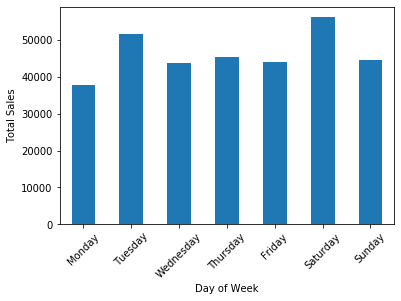

In [52]:
# AD-HOC ANALYSIS (with visualizations)

# Show purchases by the day of week

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week and add a new column 'Day_of_week'
df['Day_of_week'] = df['Date'].dt.dayofweek

day_of_week_total = df.groupby('Day_of_week')['Total'].sum()

day_of_week_total.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), day_labels, rotation=45)
plt.show()


In [53]:
# Purchases by the period of the day 

# Create new column Time of Day

def classify_time_of_day(time):
    hour = int(time.split(":")[0])
    if hour < 12:
        return "Morning"
    elif hour < 18:
        return "Afternoon"
    else:
        return "Evening"

df["Time_of_Day"] = df["Time"].apply(classify_time_of_day)


In [54]:
# Calculate sales by the time of day

sales_by_time_of_day = df.groupby("Time_of_Day").sum()["Total"]
print(sales_by_time_of_day)

Time_of_Day
Afternoon    172468.5585
Evening       88699.3800
Morning       61798.8105
Name: Total, dtype: float64


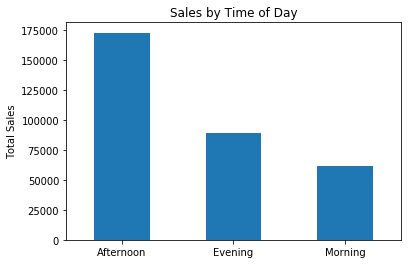

In [55]:
# Plot sales by time of day

sales_by_time_of_day.plot(kind='bar')
plt.xlabel(" ")
plt.ylabel("Total Sales")
plt.title("Sales by Time of Day")
plt.xticks(rotation=0)
plt.show()

In [56]:
# Compare Members vs non-Members sale

members_vs_others = df.groupby("Customer type").sum()["Total"]
print(members_vs_others)

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


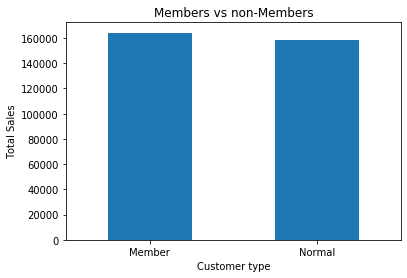

In [57]:
# Plot Members vs non-Members sale

members_vs_others.plot(kind='bar')
plt.xlabel("Customer type")
plt.ylabel("Total Sales")
plt.title("Members vs non-Members")
plt.xticks(rotation=0)
plt.show()

In [58]:
# Compare sales by gender and product line

sales_by_gender_and_product_line = df.groupby(["Gender", "Product line"]).sum()["Total"]
print(sales_by_gender_and_product_line)

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


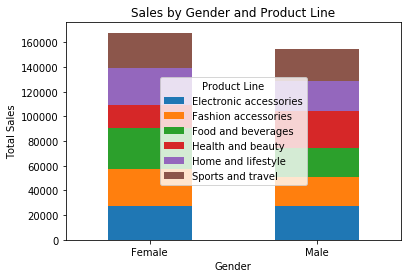

In [59]:
# Plot sales by gender and product line

ax = sales_by_gender_and_product_line.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.title("Sales by Gender and Product Line")
plt.legend(title="Product Line")
plt.legend(title="Product Line", loc='center')
plt.xticks(rotation=0)
plt.show()


In [60]:
# Group by Gender and Product line (including reset index)

grouped = sales_by_gender_and_product_line.reset_index()
pivot_table = grouped.pivot(index='Product line', columns='Gender', values='Total')
differences = pivot_table['Female'] - pivot_table['Male']
differences = differences.sort_values(ascending=False)
print(differences)

Product line
Food and beverages        10196.9910
Fashion accessories        6568.9050
Home and lifestyle         6211.8420
Sports and travel          2026.6155
Electronic accessories     -133.4865
Health and beauty        -12071.7660
dtype: float64


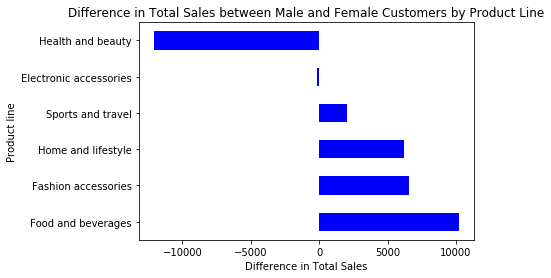

In [61]:
# Plot with horizontal bars

differences.plot(kind='barh', x='Product line', y='Difference', color='blue', legend=False)
plt.xlabel('Difference in Total Sales')
plt.title('Difference in Total Sales between Male and Female Customers by Product Line')
plt.show()